In [1]:
import numpy as np
from scipy import integrate
from scipy.misc import derivative
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [69]:
def linear_combination_function(coefficients, basis_functions):
    def combined_function(x):
        return sum(c * f(x) for c, f in zip(coefficients, basis_functions))
    return combined_function

def trapezoidal_rule(func, x_inicial, x_final, num_points):
    x = np.linspace(x_inicial, x_final, num_points)
    y = func(x)
    h = (x_final - x_inicial) / (num_points - 1)
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    return integral

def gaussian_quad(func, x_inicial, x_final, args=None):
    def_integral = integrate.quad(func, x_inicial, x_final)[0]
    return def_integral

def galerkin_method(basis_functions, fonte, funcionais, x_inicial, x_final, integration_method, args=None):
    #args = num_partitions caso integration_method == trapezoidal_rule]
    n = len(basis_functions)
    A = np.zeros((n, n))
    l = np.zeros(n) 

    funcional_incognita = funcionais['funcional_incognita']    
    funcional_fonte = funcionais['funcional_fonte']
    
    for i in range(n):
        for j in range(n):
            A[i, j] = funcional_incognita(basis_functions[i], basis_functions[j], integration_method, x_inicial, x_final, args)
            
        l[i] = funcional_fonte(basis_functions[i], fonte, integration_method, x_inicial, x_final, args)
        
    coef = np.linalg.solve(A, l)
    return coef

def plot_sol(X, sol_aproximada, sol_analitical):
    
    err = lambda x: sol_analitica(x) - sol_aproximada(x)
    
    plt.figure(figsize=(15,6))
    plt.plot(X, sol_aproximada(X), label="solução aproximada", linestyle='-', color='b')
    plt.plot(X, sol_analitica(X), label="solução analítica", linestyle='-', color='r')
    plt.plot(X, err(X), label="Erro", linestyle='--')
    plt.ylabel("y")
    plt.xlabel("x")
    plt.legend(loc='best', fontsize=12)
    plt.grid(True)
    plt.title("Comparação entre a solução aproximada e a analítica")
    
    plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
    plt.show()


    err_rel = np.sqrt( integrate.simpson(err(X)**2) / integrate.simpson(sol_analitica(X)**2) )
    print(f'Erro relativo: {err_rel}')

### Poisson:

$$-u^{"}(x) = f(x), \quad \text{com} \quad u(x_{inicial})=u(x_{final})=0.$$

In [3]:
def funcional_incognita_Poisson(func1, func2, integration_method, x_inicial, x_final, args):
    integrand = lambda x: derivative(func1, x, dx=1e-4) * derivative(func2, x, dx=1e-4)
    return integration_method(integrand, x_inicial, x_final, args)

def funcional_fonte_Poisson(func, fonte, integration_method, x_inicial, x_final, args):
    integrand = lambda x: func(x) * fonte(x)
    return integration_method(integrand, x_inicial, x_final, args)

funcionais_Poisson = {'funcional_incognita': funcional_incognita_Poisson, 'funcional_fonte': funcional_fonte_Poisson}

In [ ]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: np.sin(np.pi * x) / (np.pi)**2 
basis_func_2 = lambda x: x*(x-1)
basis_func_3 = lambda x: x*(x-1)**2
basis_func_4 = lambda x: (x**2)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3, basis_func_4]

f = lambda x: np.sin(np.pi * x)

sol_analitica = lambda x: np.sin(np.pi * x) / (np.pi)**2 

coef_gaussian = galerkin_method(basis_functions, f, funcionais_Poisson, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)
print(f"Coordenadas da base: {coef_gaussian}")

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 1: 

Problema $V$: Encontrar $u \in \mathbb{V}$ tal que

\begin{equation}
\int_0^1[u'v'+uv]\text{dx} = \int_0^1xv\text{dx}, \quad \forall v \in \mathbb{V}
\end{equation}

onde $\mathbb{V}$ é o espaço das funções diferenciáveis que satisfazem $v(0) = v(1) = 0$.

In [6]:
def funcional_incognita_1(func1, func2, integration_method, x_inicial, x_final, args):
    integrand = lambda x: derivative(func1, x, dx=1e-4) * derivative(func2, x, dx=1e-4) + func1(x)*func2(x)
    return integration_method(integrand, x_inicial, x_final, args)

def funcional_fonte_1(func, fonte, integration_method, x_inicial, x_final, args):
    integrand = lambda x: func(x) * fonte(x)
    return integration_method(integrand, x_inicial, x_final, args)

funcionais_1 = {'funcional_incognita': funcional_incognita_1, 'funcional_fonte': funcional_fonte_1}

In [ ]:
coef_1_3 = coef_gaussian

x_inicial = 0
x_final = 1

basis_func_1 = lambda x: x*(x-1)
basis_func_2 = lambda x: (x**2)*(x-1)
basis_func_3 = lambda x: (x**3)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

f = lambda x: x

sol_analitica  = lambda x: x - np.sinh(x)/np.sinh(1)

coef_gaussian = galerkin_method(basis_functions, f, funcionais_1, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)
print(f"Coordenadas da base: {coef_gaussian}")

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 2:

\begin{equation}
\phi_i(x) = \sin{(i\pi x)}
\end{equation}

In [70]:
def galerkin_method_2(basis_functions, fonte, funcional_fonte, x_inicial, x_final, integration_method, args=None):
    #args = num_partitions caso integration_method == trapezoidal_rule]
    n = len(basis_functions)
    A = np.zeros((n, n))
    l = np.zeros(n) 
    
    for i in range(n):
        for j in range(n):
            if i == j:
                A[i,j] = 1/2 * ((i+1)**2 * np.pi**2 + 1)
            else:
                A[i,j] = 0
            
        l[i] = funcional_fonte(basis_functions[i], fonte, integration_method, x_inicial, x_final, args)

    print(A)
    coef = np.linalg.solve(A, l)
    return coef

Coordenadas da base: [ 0.05856881 -0.00786369  0.00236241]


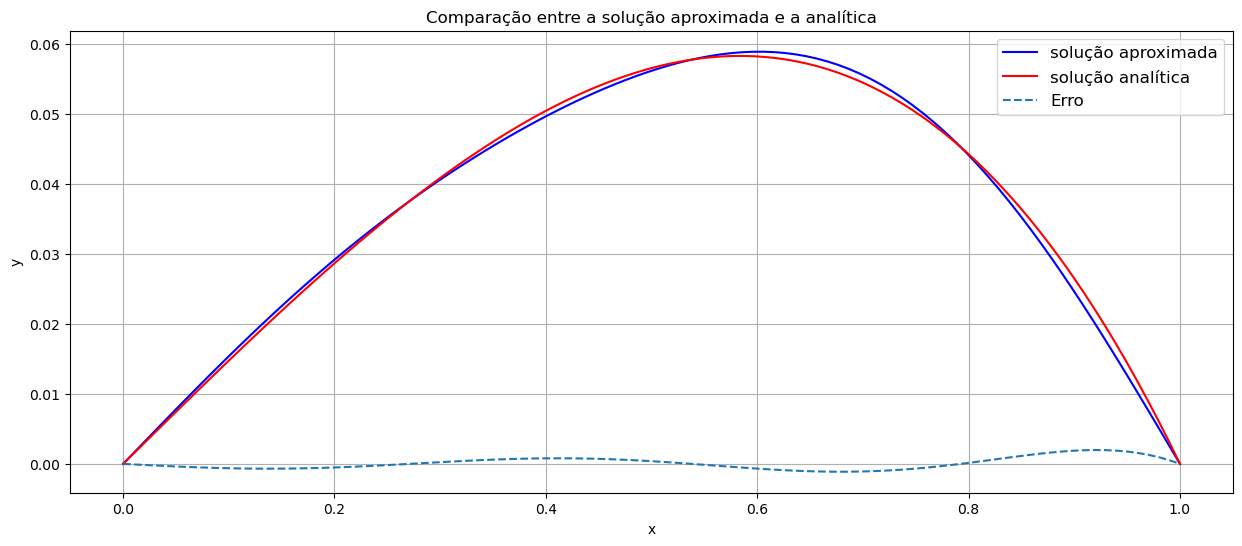

Erro relativo: 0.02018416831009187


In [45]:
x_inicial = 0
x_final = 1

basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)
basis_func_4 = lambda x: np.sin(4* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

f = lambda x: x

sol_analitica = lambda x: x - np.sinh(x)/np.sinh(1)

coef_gaussian = galerkin_method_2(basis_functions, f, funcional_fonte_1, x_inicial, x_final, gaussian_quad)
sol_aproximada = linear_combination_function(coef_gaussian, basis_functions)
print(f"Coordenadas da base: {coef_gaussian}")

X = np.linspace(0,1,100)
plot_sol(X, sol_aproximada, sol_analitica)

### Exercício 3:

In [ ]:
# Para exercício 1:
basis_func_1 = lambda x: x*(x-1)
basis_func_2 = lambda x: (x**2)*(x-1)
basis_func_3 = lambda x: (x**3)*(x-1)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

sol_aprox_1_1 = linear_combination_function(coef_1_1, [basis_func_1])
sol_aprox_1_2 = linear_combination_function(coef_1_2, [basis_func_1, basis_func_2])
sol_aprox_1_3 = linear_combination_function(coef_1_3, [basis_func_1, basis_func_2, basis_func_3])

plt.figure(figsize=(15,6))

plt.plot(X, np.gradient(sol_aprox_1_1(X)), label='n=1')
plt.plot(X, np.gradient(sol_aprox_1_2(X)), label='n=2')
plt.plot(X, np.gradient(sol_aprox_1_3(X)), label='n=3')
plt.plot(X, np.gradient(sol_analitica(X)), label='solução analítica', linestyle='--')
plt.legend()
plt.grid(True)

plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()

In [ ]:
# Para exercício 2:
basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3]

sol_aprox_2_1 = linear_combination_function(coef_2_1, [basis_func_1])
sol_aprox_2_2 = linear_combination_function(coef_2_2, [basis_func_1, basis_func_2])
sol_aprox_2_3 = linear_combination_function(coef_2_3, [basis_func_1, basis_func_2, basis_func_3])

plt.figure(figsize=(15,6))

plt.plot(X, np.gradient(sol_aprox_2_1(X)), label='n=1')
plt.plot(X, np.gradient(sol_aprox_2_2(X)), label='n=2')
plt.plot(X, np.gradient(sol_aprox_2_3(X)), label='n=3')
plt.plot(X, np.gradient(sol_analitica(X)), label='solução analítica', linestyle='--')
plt.legend()
plt.grid(True)

plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()

### Exercício 4:

Pulei por enquanto (muito estranho)

### Exercício 5:

\begin{equation}
\phi_i(x) = \sin{(i\pi x)}
\end{equation}

item b): $n= 2,4,8$

In [56]:
x_inicial = 0
x_final = 1
sol_analitica = lambda x: x - np.sinh(x)/np.sinh(1)

basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)
basis_func_4 = lambda x: np.sin(4* np.pi * x)
basis_func_5 = lambda x: np.sin(5* np.pi * x)
basis_func_6 = lambda x: np.sin(6* np.pi * x)
basis_func_7 = lambda x: np.sin(7* np.pi * x)
basis_func_8 = lambda x: np.sin(8* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3, basis_func_4, basis_func_5, basis_func_6, basis_func_7, basis_func_8]

coef_8 = list()
for i in range(1, len(basis_functions) + 1):
    coef_8.append(2*((-1)**(i+1) / (i**3 * np.pi**3 + i*np.pi)))

sol_aproximada_8 = linear_combination_function(coef_8, basis_functions)
print(f"Coordenadas da base: {coef_8}")

X = np.linspace(0,1,100)

Coordenadas da base: [0.05856880792310887, -0.007863693914495441, 0.00236240678925932, -0.0010015182625499233, 0.0005139416239845846, -0.0002977872034944878, 0.00018766753931747737, -0.0001257834231715866]


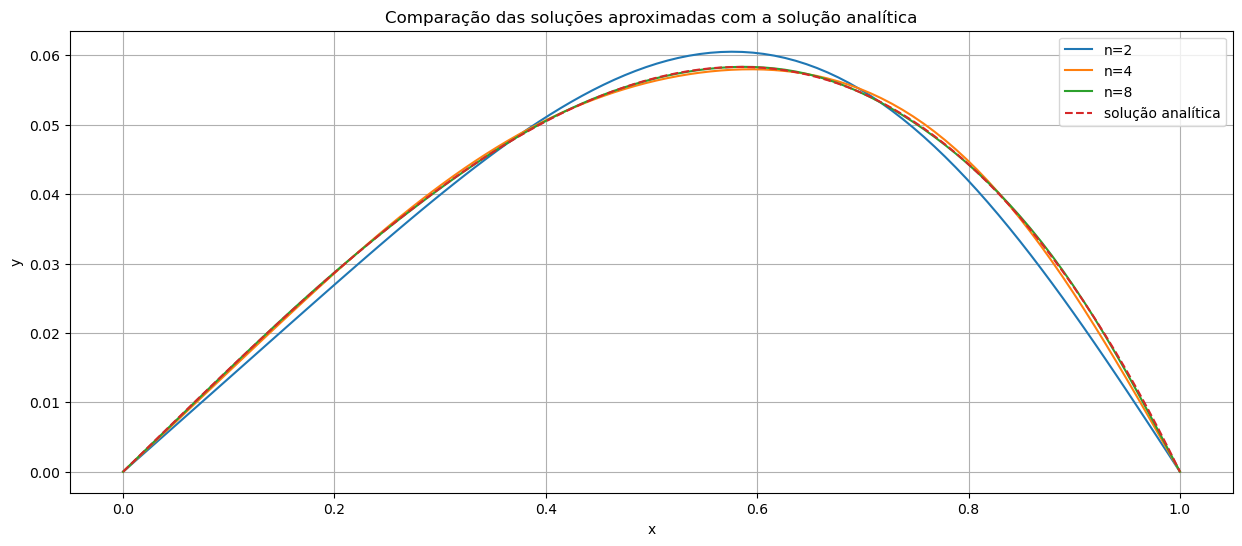

In [60]:
plt.figure(figsize=(15,6))

plt.plot(X, sol_aproximada_2(X), label='n=2')
plt.plot(X, sol_aproximada_4(X), label='n=4')
plt.plot(X, sol_aproximada_8(X), label='n=8')
plt.plot(X, sol_analitica(X), label='solução analítica', linestyle='--')
plt.legend()
plt.grid(True)
plt.title("Comparação das soluções aproximadas com a solução analítica")
plt.ylabel("y")
plt.xlabel("x")

plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()

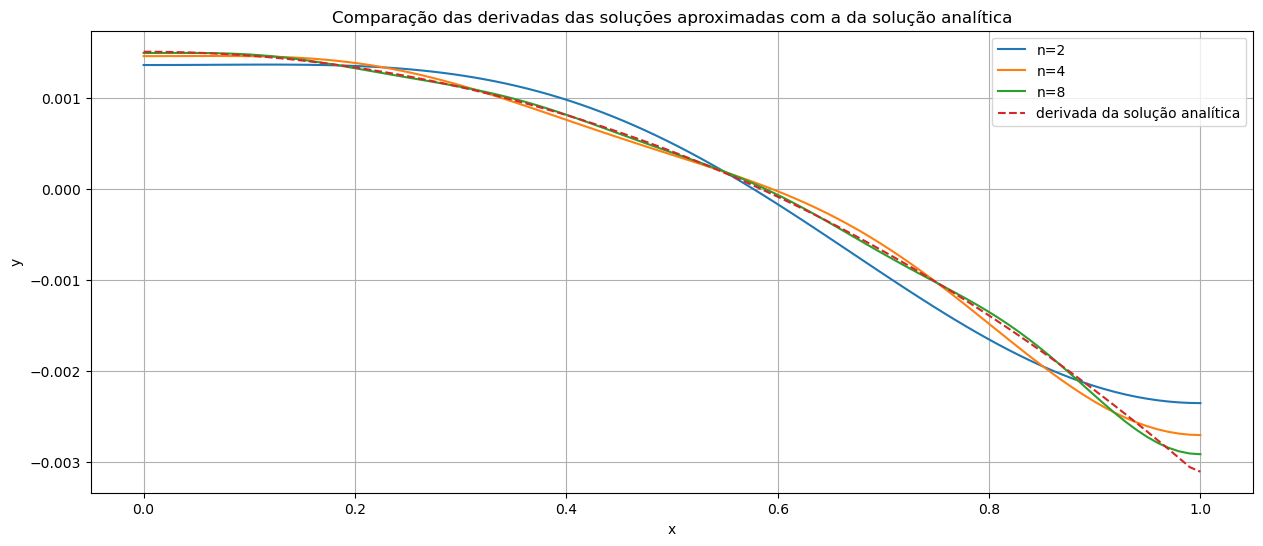

In [61]:
plt.figure(figsize=(15,6))

plt.plot(X, np.gradient(sol_aproximada_2(X)), label='n=2')
plt.plot(X, np.gradient(sol_aproximada_4(X)), label='n=4')
plt.plot(X, np.gradient(sol_aproximada_8(X)), label='n=8')
plt.plot(X, np.gradient(sol_analitica(X)), label='derivada da solução analítica', linestyle='--')
plt.legend()
plt.grid(True)
plt.title("Comparação das derivadas das soluções aproximadas com a da solução analítica")
plt.ylabel("y")
plt.xlabel("x")


plt.savefig("C:\\Users\\Usuario\\OneDrive\\Documents\\UNICAMP\\MS712\\imagens\\last_image.png")
plt.show()

### Exercício 6:

In [71]:
x_inicial = 0
x_final = 1

num_partitions = 5

basis_func_1 = lambda x: np.sin(1* np.pi * x)
basis_func_2 = lambda x: np.sin(2* np.pi * x)
basis_func_3 = lambda x: np.sin(3* np.pi * x)
basis_func_4 = lambda x: np.sin(4* np.pi * x)
basis_func_5 = lambda x: np.sin(5* np.pi * x)
basis_func_6 = lambda x: np.sin(6* np.pi * x)

basis_functions = [basis_func_1, basis_func_2, basis_func_3, basis_func_4, basis_func_5, basis_func_6]

f = lambda x: x
sol_analitica = lambda x: x - np.sinh(x)/np.sinh(1)

coef_ex2 = galerkin_method_2(basis_functions, f, funcional_fonte_1, x_inicial, x_final, gaussian_quad)
print(f"Coordenadas da base: {coef_ex2}")

[[  5.4348022    0.           0.           0.           0.
    0.        ]
 [  0.          20.2392088    0.           0.           0.
    0.        ]
 [  0.           0.          44.9132198    0.           0.
    0.        ]
 [  0.           0.           0.          79.45683521   0.
    0.        ]
 [  0.           0.           0.           0.         123.87005501
    0.        ]
 [  0.           0.           0.           0.           0.
  178.15287922]]
Coordenadas da base: [ 0.05856881 -0.00786369  0.00236241 -0.00100152  0.00051394 -0.00029779]


In [72]:
coef_trap = galerkin_method(basis_functions, f, funcionais_1, x_inicial, x_final, integration_method=trapezoidal_rule, args=num_partitions)
print(f"Coordenadas da base: {coef_trap}")

Coordenadas da base: [ 5.55267134e-02 -1.87499975e-01  6.47208627e-02 -4.70464189e-15
 -3.88325279e-02  6.25000247e-02]


Matriz $A$ calculada utilizando a integração de Trapézio Composto para $\text{num\_partitions} =5$
\begin{equation}
A =
\begin{bmatrix}
  5.43480204e+00 & -1.08846265e-12 &  3.17967874e-13 &  3.77831100e-12 & -3.87334609e-12 &  2.22044605e-13 \\
 -1.08846265e-12 &  2.02392062e+01 &  2.22932783e-13 & -4.35207426e-12 &  5.02531350e-12 &  5.87175874e+01 \\
  3.17967874e-13 &  2.22932783e-13 &  4.49132067e+01 & -8.69526673e-12 &  7.35219916e+01 &  1.11306520e-11 \\
  3.77831100e-12 & -4.35207426e-12 & -8.69526673e-12 &  1.57913587e+02 & -5.76605430e-12 &  8.95283847e-13 \\
 -3.87334609e-12 &  5.02531350e-12 &  7.35219916e+01 & -5.76605430e-12 &  1.23869954e+02 &  3.25073302e-11 \\
  2.22044605e-13 &  5.87175874e+01 &  1.11306520e-11 &  8.95283847e-13 &  3.25073302e-11 &  1.78152669e+02
\end{bmatrix}
\end{equation}
Há valores não-nulos fora da diagonal em $(2,6), (6,2), (3,5), (5,3)$. Até o momento eu não sei o porquê isto acontece.

Matriz $A$ calculada utilizando a integração de Trapézio Composto para $\text{num\_partitions} =1000$
\begin{equation}
\begin{bmatrix}
  5.43480204e+00 & 5.63734578e-13 & 6.97996215e-13 & 8.23397406e-13 & 6.42401047e-13 & 5.94017995e-13 \\
  5.63734578e-13 & 2.02392062e+01 & 1.50852348e-12 & 1.38199495e-12 & 1.38572904e-12 & 1.27782469e-12 \\
  6.97996215e-13 & 1.50852348e-12 & 4.49132067e+01 & 2.02288458e-12 & 1.99717275e-12 & 1.57951019e-12 \\
  8.23397406e-13 & 1.38199495e-12 & 2.02288458e-12 & 7.94567936e+01 & 2.88070668e-12 & 2.38628559e-12 \\
  6.42401047e-13 & 1.38572904e-12 & 1.99717275e-12 & 2.88070668e-12 & 1.23869954e+02 & 3.35663518e-12 \\
  5.94017995e-13 & 1.27782469e-12 & 1.57951019e-12 & 2.38628559e-12 & 3.35663518e-12 & 1.78152669e+02
\end{bmatrix}
\end{equation}


In [66]:
sol_aprox_trap = linear_combination_function(coef_trap, basis_functions)
sol_aprox_ex2 = linear_combination_function(coef_ex2, basis_functions)

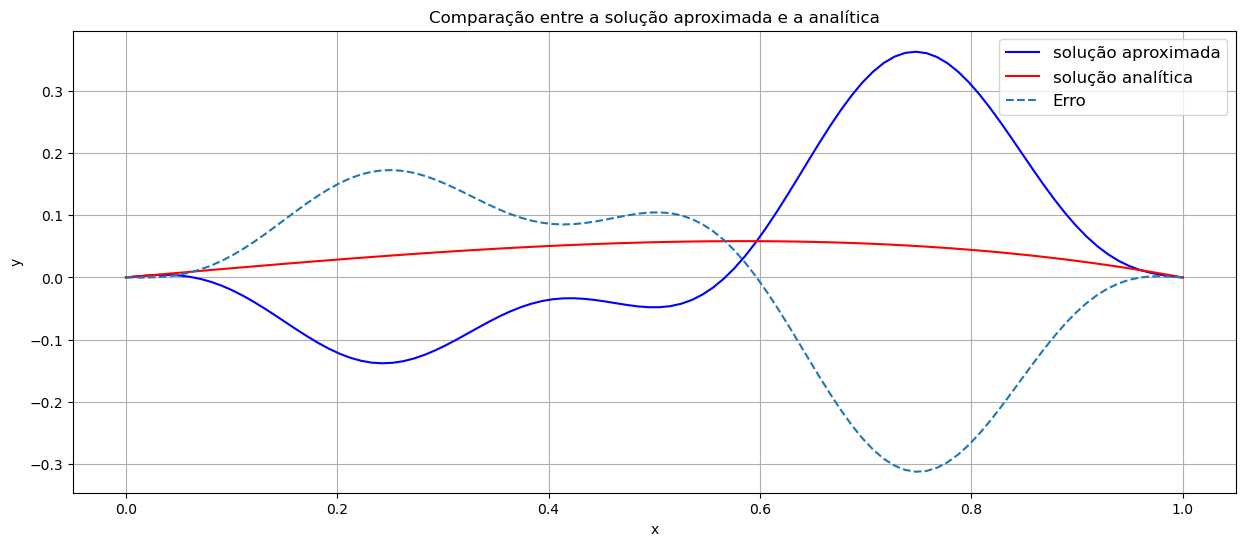

Erro relativo: 3.450462486504582


In [67]:
plot_sol(X, sol_aprox_trap, sol_analitica)

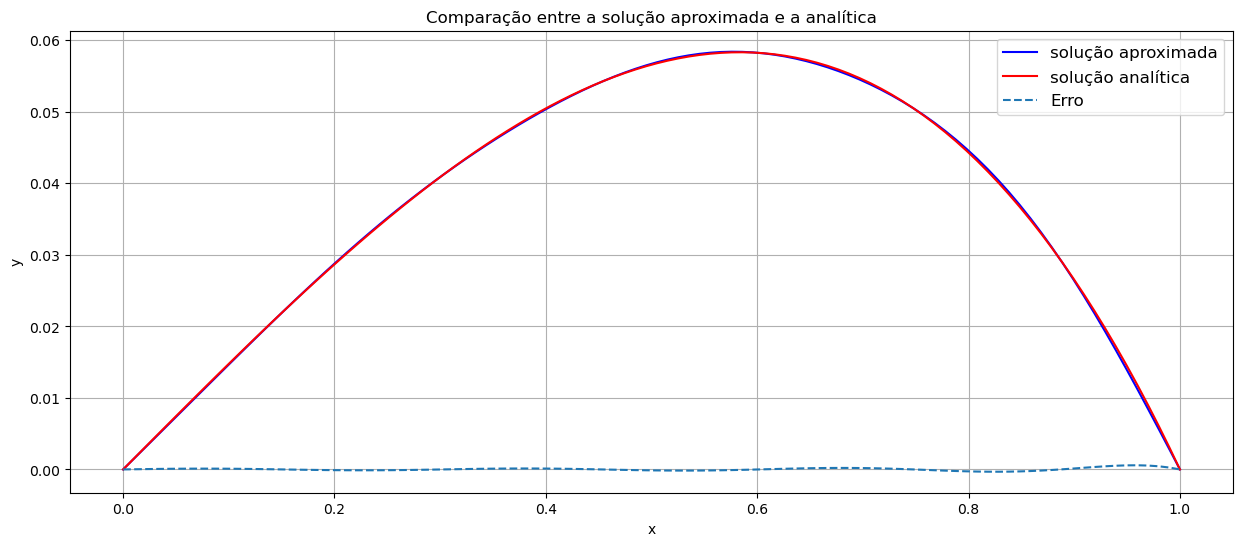

Erro relativo: 0.004458411372091579


In [68]:
plot_sol(X, sol_aprox_ex2, sol_analitica)